In [12]:
import pandas as pd
import numpy as np
from preprocessing.config import settings
from data_transformations import nbaData
from modelling import k_means, Kmeans_results,pca
from plot import biplot,choose_K_means,choose_K_means_sil,spectral_Kmeans, Kmeans_plot
from sklearn.preprocessing import StandardScaler
from nba_api.stats.endpoints import leaguedashplayerstats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



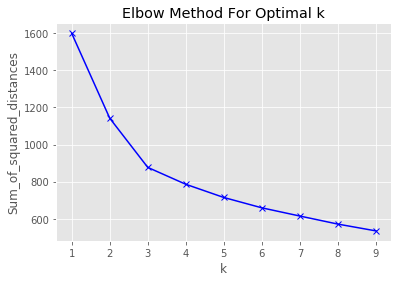

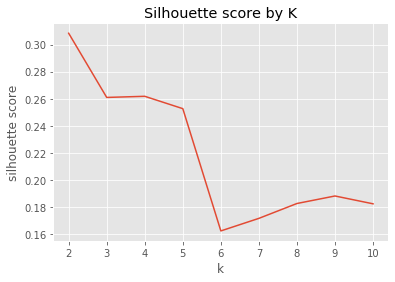

In [13]:
raw = leaguedashplayerstats.LeagueDashPlayerStats(season='2019-20').get_data_frames()[0]
nba_data_obj = nbaData(raw)
df = nba_data_obj.get_data(scaled=True)

choose_K_means(df,10)
choose_K_means_sil(df,10)

4different groups
0
                        z  Group
Player                          
Jayson Tatum     7.776097      0
Kyrie Irving     7.015435      0
Paul George      6.365920      0
Pascal Siakam    5.834876      0
Khris Middleton  5.557901      0
1
                          z  Group
Player                            
Mitchell Robinson  5.743012      1
Richaun Holmes     5.343115      1
Nerlens Noel       4.285230      1
Jarrett Allen      4.200297      1
Thomas Bryant      3.615611      1
2
                               z  Group
Player                                 
Anthony Davis          11.573345      2
Karl-Anthony Towns      9.079368      2
Hassan Whiteside        8.858240      2
Giannis Antetokounmpo   8.538690      2
Kristaps Porzingis      8.415513      2
3
                          z  Group
Player                            
Robert Covington   6.539837      3
Kelly Oubre Jr.    4.819059      3
Jaren Jackson Jr.  4.714558      3
T.J. Warren        4.513256      3
Al Horfo

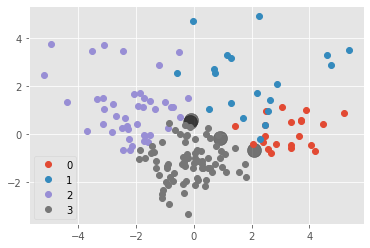

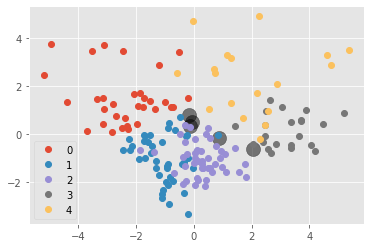

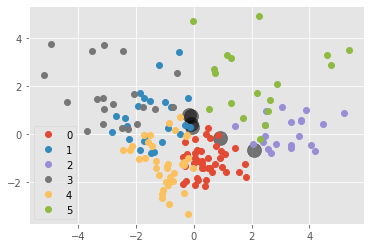

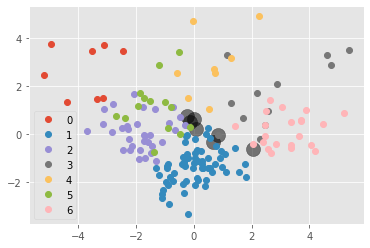

In [14]:
p = pca(df)
pca_scores = p[1]

clusters = [4,5,6,7]
for cluster in clusters:
    k = k_means(df,cluster)
    centers = k[1]
    groups = k[2]
    print(str(cluster) + 'different groups')
    Kmeans_plot(df,pca_scores,centers,groups)
    Kmeans_results(df)